# Prototipo

##### Importar las librerias necesarias

In [9]:
from scapy.all import rdpcap

##### Leer el archivo de entrada

In [10]:
packets = rdpcap('analisis_paquetes.pcap')

In [11]:
from scapy.all import TCP, IP

def detect_suspicious_flags(packets):
    for packet in packets:
        if packet.haslayer(TCP):
            tcp_layer = packet[TCP]
            if 'S' in tcp_layer.flags and 'F' in tcp_layer.flags:
                print(f"Suspicious Flags Found: {packet.summary()}")

def detect_payload_anomalies(packets, threshold=100):
    for packet in packets:
        if packet.haslayer(TCP) and len(packet[TCP].payload) > threshold:
            print(f"Large Payload: {packet.summary()}")

def detect_unusual_frequencies(packets):
    ip_counts = {}
    for packet in packets:
        if packet.haslayer(IP):
            ip_src = packet[IP].src
            ip_counts[ip_src] = ip_counts.get(ip_src, 0) + 1
    for ip, count in ip_counts.items():
        if count > 10:
            print(f"High frequency from IP {ip}: {count} packets")


In [12]:
import matplotlib.pyplot as plt

def plot_traffic_by_protocol(packets):
    protocol_counts = {}
    for packet in packets:
        if packet.haslayer(IP):
            proto = packet[IP].proto
            protocol_name = str(proto)
            protocol_counts[protocol_name] = protocol_counts.get(protocol_name, 0) + 1

    protocols = list(protocol_counts.keys())
    counts = list(protocol_counts.values())

    plt.figure(figsize=(10, 5))
    plt.bar(protocols, counts, color='blue')
    plt.title('Traffic by Protocol')
    plt.xlabel('Protocol Number')
    plt.ylabel('Number of Packets')
    plt.xticks(rotation=45) 
    plt.show()


def plot_connections_by_ip(packets):
    ip_counts = {}
    for packet in packets:
        if packet.haslayer(IP):
            ip_src = packet[IP].src
            ip_counts[ip_src] = ip_counts.get(ip_src, 0) + 1
    plt.figure(figsize=(10, 5))
    plt.bar(ip_counts.keys(), ip_counts.values(), color='green')
    plt.title('Connections by Source IP')
    plt.xlabel('IP Address')
    plt.ylabel('Number of Connections')
    plt.xticks(rotation=90)
    plt.show()

In [13]:
def trafic_per_port(packets):
    conteo_por_puerto = {}
    
    for packet in packets:
        if packet.haslayer(TCP):
            print(packet.summary())
            puerto = packet[TCP].dport
            if puerto in conteo_por_puerto:
                conteo_por_puerto[puerto] += 1
            else:
                conteo_por_puerto[puerto] = 1
            
    # Preparar datos para el gráfico
    puertos = list(conteo_por_puerto.keys())
    cantidades = list(conteo_por_puerto.values())
    
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(puertos, cantidades, color='skyblue')
    plt.xlabel('Puerto')
    plt.ylabel('Cantidad de Tráfico')
    plt.title('Tráfico por Puerto')
    plt.xticks(puertos)
    plt.grid(axis='y')
    plt.show()


In [14]:
SUSPICIOUS_IPS = ['192.168.1.100', '10.0.0.2']  # Ejemplo, usar IPs reales sospechosas

def check_suspicious_ip(packets):
    for packet in packets:
        if packet.haslayer(IP):
            src_ip = packet[IP].src
            dst_ip = packet[IP].dst
            if src_ip in SUSPICIOUS_IPS or dst_ip in SUSPICIOUS_IPS:
                print(f"Suspicious IP detected: {src_ip} -> {dst_ip}")


In [15]:
def check_malformed_packets(packets):
    for packet in packets:
        if packet.haslayer(TCP) and not packet[TCP].chksum:
            print(f"Malformed TCP packet detected: {packet.summary()}")
        if packet.haslayer(IP) and not packet[IP].chksum:
            print(f"Malformed IP packet detected: {packet.summary()}")


High frequency from IP 10.1.10.53: 31 packets
High frequency from IP 84.54.22.33: 29 packets


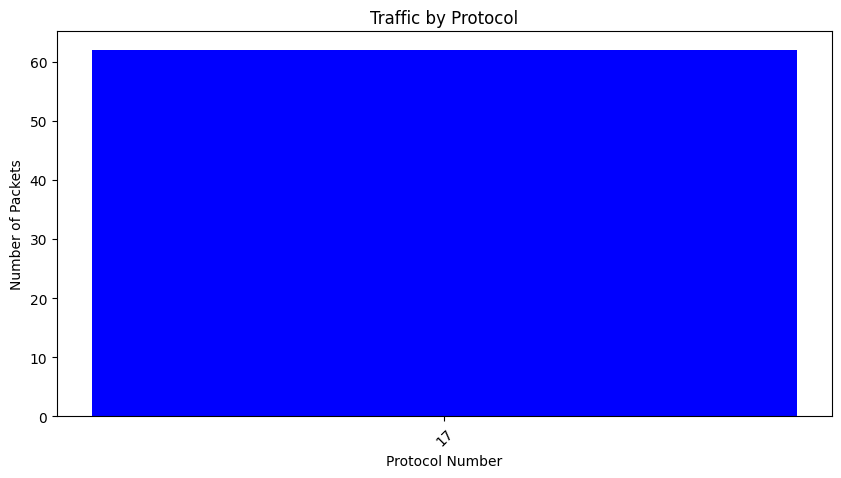

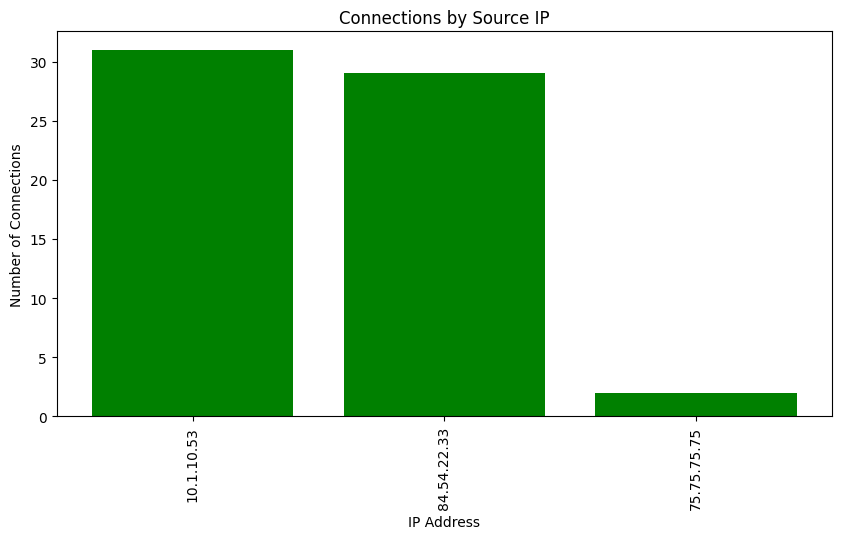

In [16]:
check_suspicious_ip(packets)
check_malformed_packets(packets)

detect_suspicious_flags(packets)
detect_payload_anomalies(packets, threshold=500)
detect_unusual_frequencies(packets)

# Utilizar las funciones de visualización
plot_traffic_by_protocol(packets)
plot_connections_by_ip(packets)
#trafic_per_port(packets)